# 二次元配列と勾配問題

## 【問題1】1次関数
xが-50から50の範囲で次の式を考えます。

$$y=\frac{1}{2}x+1$$

-50から50まで0.1間隔のxを表すndarrayと、各要素に対するyを表すndarrayを作成してください。

In [1]:
import numpy as np

np.set_printoptions(suppress=True)
x_ndarray = np.arange(-50, 50.1, 0.1)
y_ndarray = np.array(((1 / 2) * x_ndarray) + 1)

## 【問題2】配列の結合
問題1で作成したndarrayを結合し、(1001, 2)の形の配列にしてください。0列目にx、1列目にyが来るようにします。

In [2]:
x_ndarray.shape

(1001,)

In [3]:
xy_ndarray = np.stack([x_ndarray, y_ndarray], axis=1)

In [4]:
print(xy_ndarray.shape)

(1001, 2)


In [5]:
x_ndarray = x_ndarray.reshape(1001, 1) #concatenateは次元を増やせない
y_ndarray = y_ndarray.reshape(1001, 1) #代用stack

In [6]:
xy_ndarray = np.concatenate([x_ndarray, y_ndarray], axis=1) 

In [7]:
print(xy_ndarray)

[[-50.   -24.  ]
 [-49.9  -23.95]
 [-49.8  -23.9 ]
 ...
 [ 49.8   25.9 ]
 [ 49.9   25.95]
 [ 50.    26.  ]]


## 【問題3】勾配を求める
各x座標における勾配を求めます。ここで勾配はyの変化量をxの変化量で割ることで計算します。

In [8]:
x_ndarray_first = x_ndarray[1:]
x_ndarray_second = x_ndarray[:-1]
x_amount_of_change = x_ndarray_first - x_ndarray_second # xの変化量
print(x_amount_of_change.shape)

(1000, 1)


In [9]:
y_ndarray_first = y_ndarray[1:]
y_ndarray_second = y_ndarray[:-1]
y_amount_of_change = y_ndarray_first - y_ndarray_second # yの変化量
print(y_amount_of_change.shape)

(1000, 1)


In [10]:
xy_amount_of_change = y_amount_of_change / x_amount_of_change #勾配

## 【問題4】グラフを描く
1次関数のグラフをMatplotlibを用いて描いてください。また、それとは別に横軸をx、縦軸を勾配としたグラフも描いてください。

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

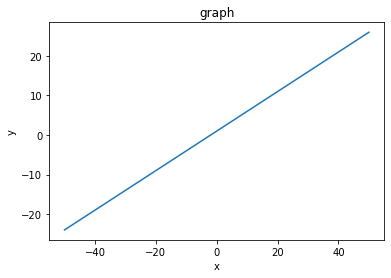

In [12]:
# 一次関数のグラフの作成
plt.title('graph')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_ndarray, y_ndarray);

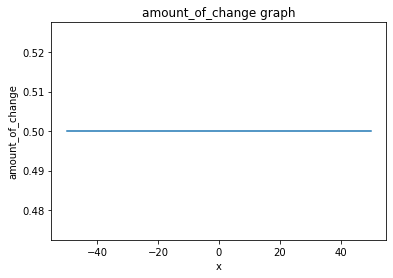

In [13]:
# 横軸をx、縦軸を勾配としたグラフ
plt.title('amount_of_change graph')
plt.xlabel('x')
plt.ylabel('amount_of_change')
plt.plot(x_ndarray[:1000, :], xy_amount_of_change);

## 【問題5】Pythonの関数化
問題1から問題3までの範囲をまとめて行うPythonの関数を雛形を参考に作成してください。

そして、以下の3式の勾配を0.1間隔で求めてndarrayで出力してください。

$$y=x^2(-50\leq x\leq50)$$
$$y=2x^2+2^x(-50\leq x\leq50)$$
$$y=\sin(x^{\frac{1}{2}})(0\leq x\leq50)$$

また、問題4と同様にグラフを描いてください。

ndarrayに対して三角関数のsinの計算を行うには np.sin()を用います。

In [14]:
def compute_amount(function, x_range=(-50, 50.1, 0.1)):
    '''
    function : xの範囲[x_range]とy[function]から勾配[amount_of_change]を返す関数
    
    param
    -------------
    x_range : ndarray
        xの取りうる値
    function : ndarray
        yを求める式
    -------------
    return : amount_of_change : int or flout
        勾配
    '''
    x_ndarray = np.arange(*x_range)
    y_ndarray = function(x_ndarray)
    # function = (x_ndarray) = x_ndarray ** 2
    
    # xの変化量
    x_ndarray_first = x_ndarray[1:]
    x_ndarray_second = x_ndarray[:-1]
    x_amount_of_change = x_ndarray_first - x_ndarray_second
    
    # yの変化量
    y_ndarray_first = y_ndarray[1:]
    y_ndarray_second = y_ndarray[:-1]
    y_amount_of_change = y_ndarray_first - y_ndarray_second
    
    amount_of_change = y_amount_of_change / x_amount_of_change #勾配
    
    return amount_of_change

In [15]:
def function1(x_ndarray):
    y_ndarray = x_ndarray ** 2
    return y_ndarray

In [16]:
def function2(x_ndarray):
    y_ndarray = (2 * x_ndarray ** 2) + (2 ** x_ndarray)
    return y_ndarray

In [17]:
def function3(x_ndarray):
    y_ndarray = np.sin(x_ndarray ** (1 / 2))
    return y_ndarray

In [18]:
# test = (-1, 1 , 0.1)
# test_ndarray = np.arange(*test) # *をつけることによって展開される

In [19]:
amount_of_change_1 = compute_amount(function1)# 式1の勾配のndarray
# 現時点でfunctionの引数を指定していなくても、実際に使用される関数内部で引数を与えてあげれば問題なく
# 使用できる。
# 逆にfuntion()だけでは当然エラーを吐く
# おそらくdefの引数として宣言するタイミングでは特に引数の内容を見ているわけではなく、実際に使用する
# タイミングで内部を見ているものと考えられる。

In [20]:
amount_of_change_2 = compute_amount(function2) # 式2の勾配のndarray

In [21]:
amount_of_change_3 = compute_amount(function3, x_range=(0, 50.1, 0.1))# 式3の勾配のndarray
# sqrtの中にマイナス入れると虚数とるためNANを返す

## 【問題6】最小値を求める
問題5で扱った関数のyの最小値を求めます。xの範囲も問題5と同様とします。

今回は勾配降下法ではなく、ndarrayのminメソッド、argminメソッドを用いてください。minメソッドは最小値を、argminメソッドは最小値のインデックスを取得することができます。

また、最小のyをとる前後の勾配を表示してください

In [22]:
def get_y_min(function, x_range=(-50, 50.1, 0.1)):
    '''
    function : xの範囲[x_range]とy[function]からyの最小値[y_min]を返す関数
    
    param
    -------------
    x_range : ndarray
        xの取りうる値
    function : ndarray
        yを求める式
    -------------
    return : y_min : int or flout
        勾配
    '''
    x_ndarray = np.arange(*x_range)
    y_ndarray = function(x_ndarray)
    
    y_min = np.min(y_ndarray) # yの最小値
    
    return y_min, x_ndarray, y_ndarray

yの最小値は : 5.048710e-25


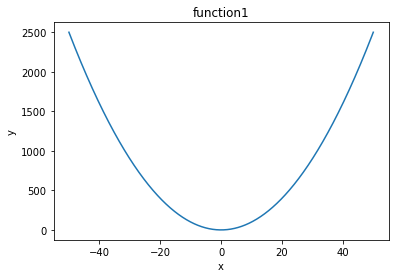

In [23]:
func1_y_min, func1_x_ndarray, func1_y_ndarray = get_y_min(function1)
# 一次関数のグラフの作成
plt.title('function1')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(func1_x_ndarray, func1_y_ndarray);
print('yの最小値は : {:e}'.format(func1_y_min))
#rangeでは誤差が生じるため正確な結果は得られない

In [24]:
function1(0)  #ちゃんとした答えは0

0

In [25]:
def get_y_min_npappend(function, x_range=(-50, 50.1, 0.1)): # np.appendを用いた正確な値を返す関数
    '''
    function : xの範囲[x_range]とy[function]からyの最小値[y_min]を返す関数
    
    param
    -------------
    x_range : ndarray
        xの取りうる値
    function : ndarray
        yを求める式
    -------------
    return : y_min : int or flout
        勾配
    '''
    x_ndarray = np.arange(*x_range)
    x_ndarray_r = np.array([]) # 計算用空リストの作成
    for i in x_ndarray: # 内容ひとつづつ取り出す
        x_ndarray_r = np.append(x_ndarray_r, round(i, 1)) #小数点第1で四捨五入して再格納
    y_ndarray = function(x_ndarray_r)
    
    y_min = np.min(y_ndarray) # yの最小値
    
    return y_min, x_ndarray_r, y_ndarray

yの最小値は : 0.0


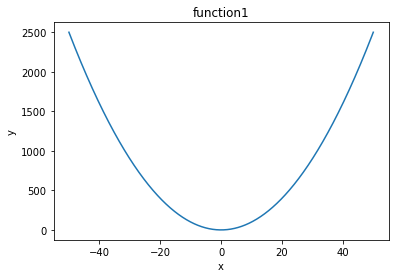

In [26]:
func1_y_min, func1_x_ndarray, func1_y_ndarray = get_y_min_npappend(function1)
# 一次関数のグラフの作成
plt.title('function1')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(func1_x_ndarray, func1_y_ndarray);
print('yの最小値は : {}'.format(func1_y_min))

In [27]:
# argminの使い方
test = np.arange(-5, 5)
print(test)
te = np.argmin(test)
print(te)

[-5 -4 -3 -2 -1  0  1  2  3  4]
0


In [28]:
def get_y_min_list(function, x_range=(-50, 50.1, 0.1)): # listを用いた正確な値を返す関数+勾配を求める
    '''
    function : xの範囲[x_range]とy[function]からyの最小値[y_min]を返す関数
    
    param
    -------------
    x_range : ndarray
        xの取りうる値
    function : ndarray
        yを求める式
    -------------
    return : y_min : int or flout
        勾配
    '''
    x_ndarray = np.arange(*x_range)
    x_ndarray_r = [] # 計算用空リストの作成
    for i in x_ndarray: # 内容ひとつづつ取り出す
        x_ndarray_r.append(round(i, 1)) #小数点第1で四捨五入して再格納
    x_ndarray_r = np.array(x_ndarray_r)
    y_ndarray = function(x_ndarray_r)
    
    y_min = np.min(y_ndarray) # yの最小値
    y_min_arg = np.argmin(y_ndarray) # yの最小値の時の添字
    x_amount = x_ndarray_r[y_min_arg - 1] -  x_ndarray_r[y_min_arg + 1] # 最小のyをとる前後のxの変化量(0.2)
    y_amount = function(x_ndarray_r[y_min_arg - 1]) - function(x_ndarray_r[y_min_arg + 1]) # 最小のyをとる前後のyの変化量
    y_min_amount = y_amount / x_amount # 最小のyをとる前後の勾配
    
    return y_min, y_min_arg, y_min_amount, x_ndarray_r, y_ndarray

yの最小値は : 0.0
yの最小値のインデックスは : 500
最小のyを取る前後の勾配は : -0.0


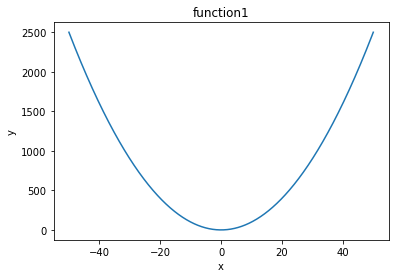

In [29]:
func1_y_min, func1_y_min_arg, func1_y_min_amount, func1_x_ndarray, func1_y_ndarray = get_y_min_list(function1)
plt.title('function1')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(func1_x_ndarray, func1_y_ndarray);
print('yの最小値は : {}'.format(func1_y_min))
print('yの最小値のインデックスは : {}'.format(func1_y_min_arg))
print('最小のyを取る前後の勾配は : {}'.format(func1_y_min_amount))

yの最小値は : 9.505506e-01
yの最小値のインデックスは : 498
最小のyを取る前後の勾配は : -0.1960970240971405


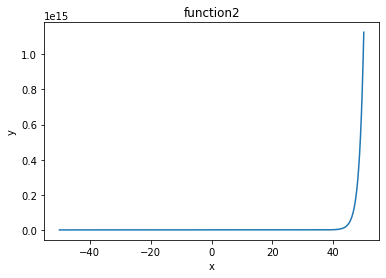

In [30]:
func2_y_min, func2_y_min_arg, func2_y_min_amount, func2_x_ndarray, func2_y_ndarray = get_y_min_list(function2)
plt.title('function2')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(func2_x_ndarray, func2_y_ndarray);
print('yの最小値は : {:e}'.format(func2_y_min))
print('yの最小値のインデックスは : {}'.format(func2_y_min_arg))
print('最小のyを取る前後の勾配は : {}'.format(func2_y_min_amount))

yの最小値は : -9.999998e-01
yの最小値のインデックスは : 222
最小のyを取る前後の勾配は : -7.56972314441831e-05


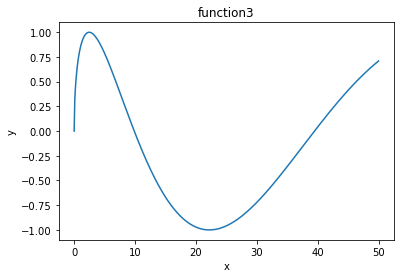

In [31]:
func3_y_min, func3_y_min_arg, func3_y_min_amount, func3_x_ndarray, func3_y_ndarray = get_y_min_list(function3, x_range=(0, 50.1, 0.1))
plt.title('function3')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(func3_x_ndarray, func3_y_ndarray);
print('yの最小値は : {:e}'.format(func3_y_min))
print('yの最小値のインデックスは : {}'.format(func3_y_min_arg))
print('最小のyを取る前後の勾配は : {}'.format(func3_y_min_amount))